# Chaper 1: Create Animation






I’ll use animation to illustrate how machine learning works in this book. In this chapter, you’ll learn to create animation using Python. 

After you finish this chapter, you'll be able to create the following aniation of GDPs over time for five countries (US, China, Japan, Germany, and UK) in the format of horizontal bar charts.
<img src="https://gattonweb.uky.edu/faculty/lium/ml/bar_sorted.gif" width="500" height="400"/>

or in the format of line plots
<img src="https://gattonweb.uky.edu/faculty/lium/ml/GDPsOLD.gif" width="500" height="400"/>

## 1. Install Python and Jupyter Notebook

### 1.1. Install Anaconda
To install Python via Anaconda, go to the following website https://www.anaconda.com/products/individual and scroll down to the bottom of the page. Then download the latest version of Python 3 for your operating system (Windows, MAC, or Linux), and install it.

### 1.2. Create A Virtual Environment
It's highly recommended that you create a separate virtual environment for this book. Let’s name the virtual environment we want to create for this book ***animatedML***, and you can use other names of your choice. Enter the following command in the Anaconda prompt or the terminal:

`conda create -n animatedML`

After pressing the ENTER key on your keyboard, follow the instructions on the screen and press y when the prompt asks you y/n. 

### 1.3. Set Up Jupyter Notebook in the Virtual Environment
Now we need to set up Jupyter Notebook in the newly created virtual environment on your computer.
First, activate the virtual environment by running the following line of code in the Anaconda prompt (in Windows) or a terminal (in Mac or Linux):

`
conda ctivate animatedML
`

To install Jupyter Notebook in the virtual environment, run the command 

`
conda install notebook
`

To launch Jupyter Notebook, execute the following command in the same terminal with the virtual environment activated:

`
jupyter notebook
`

## 2. Create Plots with Matplotlib
Animation is a sequence of graphs. Therefore, to create animation, you’ll first learn how to create graphs. We'll use the ***matplotlib*** Python library for that. You’ll then use the ***imageio*** library to combine graphs into animation in the ***gif*** format.<br> 
Before you start coding, install the libraries you need by running the following lines of command in the Anaconda prompt (Windows) or a terminal (Mac or Linux), with your virtual environment ***animatedML*** activated:<br>
`pip install matplotlib` <br>
`pip install pandas`<br>
`pip install imageio`<br>


### 2.1. A Single Line Plot
We’ll use the annual gross domestic product (GDP) data from the **World Bank** (the Appendix of this chapter provides details of how to obtain and clean up the data). To create a line plot, you can use the *plot()* method and put the x-axis and y-axis values as the first two arguments. Use the *title()* method to put a figure title on top of the line plot so that people know what the figure is about. Similarly, you can label the x- and y-axis using the methods *xlabel()* and *ylabel()* so that people know what variables you use as the x- and y-values. 

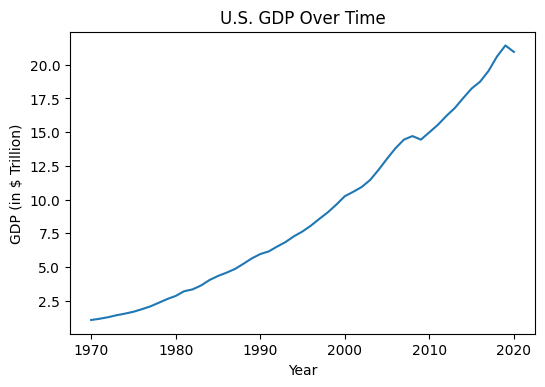

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

df=pd.read_csv("https://gattonweb.uky.edu/faculty/lium/ml/GDPs.csv") 
fig=plt.figure(dpi=100) 
plt.plot(df["year"], df["USA"])
plt.xlabel('Year')
plt.ylabel('GDP (in $ Trillion)')
plt.title('U.S. GDP Over Time')
plt.show()

### 2.2. Multiple Line Plots in the Same Figure
You can also plot more than one lines in the same figure. We’ll add the GDP of China to the previous plot. The *plot()* method has several optional arguments: the **color** argument specifies the color of the line, which can take values such as blue, red, or green. The **linestyle** argument can be solid, dashed, or dotted. The **linewidth** argument determines how thick the line is. 

Make sure you use the *show()* method after you plot all the lines you intend to include in the figure.

The *legend()* method adds a legend to the figure, and the labels for the two lines are USA and China, respectively. The *grid()* method makes the grid lines visible on the figure, which makes it easier for us to estimate the GDP values each year based on the height of the line plots. 

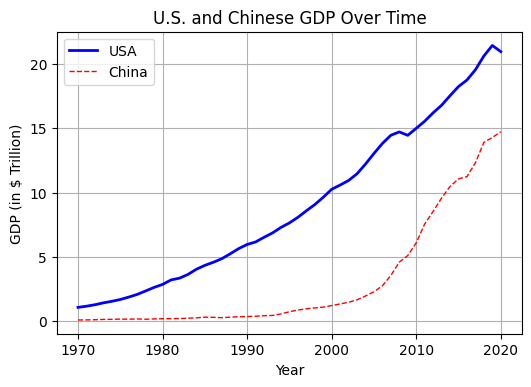

In [8]:
fig=plt.figure(dpi=100) 
plt.plot(df["year"],df["USA"],color='blue',linestyle='solid',linewidth=2)
plt.plot(df["year"],df["China"],color='red',linestyle='dashed',linewidth=1)
plt.xlabel('Year')
plt.ylabel('GDP (in $ Trillion)')
plt.title('U.S. and Chinese GDP Over Time')
plt.legend(labels=["USA","China"])
plt.grid() 
plt.show()

## 3. Create Animated Plots
Next, we’ll create an animation of the GDP values of the five countries over time. We’ll first create a plot of the five countries’ GDPs each year. That gives us a total of 51 graphs. We’ll then combine the graphs in a single ***gif*** file so that the graphs will appear sequentially. As a result, you’ll see the animation effect. 


### 3.1. Generate Annual Line Plots 
Instead of ending in year 2020, we’ll iterate the end year from 1971 to year 2020. In each iteration, we’ll plot the GDPs of the five countries (U.S., China, Japan, Germany, and U.K.) over time. The starting year is always 1970. You’ll also save the figure on your computer in each iteration. This creates a total of 50 figures.

the subfolder /photos already exists


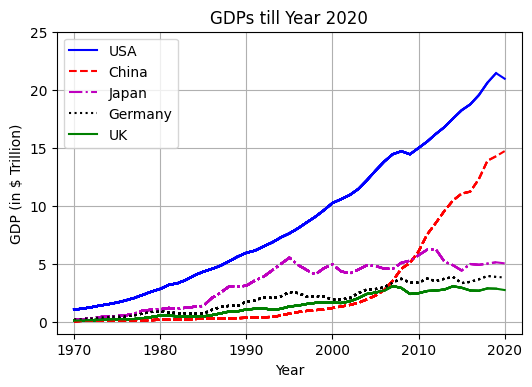

In [9]:
import os
try:
    os.makedirs('photos') 
except:
    print("the subfolder /photos already exists")

fig=plt.figure(dpi=100)
plt.grid()
plt.xlabel('Year')
plt.ylabel('GDP (in $ Trillion)')
plt.xlim(1968,2022) 
plt.ylim(-1,25)

for i in range(1971,2021,1):
    dfi=df[df["year"]<=i]  
    plt.plot(dfi["year"],dfi["USA"],color='b',linestyle='-') 
    plt.plot(dfi["year"],dfi["China"],color='r',linestyle='--')
    plt.plot(dfi["year"],dfi["Japan"],color='m',linestyle='-.')
    plt.plot(dfi["year"],dfi["Germany"],color='k',linestyle=':')
    plt.plot(dfi["year"],dfi["UK"],color='g',linestyle=None)
    plt.legend(labels=["USA","China","Japan","Germany","UK"],
               loc="upper left")
    plt.title(f'GDPs till Year {i}') 
    plt.savefig(f"photos/year{i}.png")

We first use the *makedirs()* method in the ***os*** library to create a subfolder *photos* to hold all figures. When you re-run the program, the program will print a message telling you that the subfolder already exists. We set the limits of the x-axis from 1968 to 2022 by using the *xlim()* method. Similarly, we set the limits of the y-axis from -1 to 25 trillion dollars by using the *ylim()* method. We iterate the value *i* through years 1971 to 2020. In each iteration, we extract the GDP values from 1970 to year *i*. Each country is plotted with a different color and line style. The values b, r, m, k, and g are aliases for the colors blue, red, magenta, black, and green, respectively. We do not include the line width option in the *plot()* method so the line width has a default value of 1. 

For each iteration, we dynamically set the figure title to reflect the end year. Finally, the plot in each iteration is saved as a picture in the ***png*** format in the subfolder *photos*. If you open the subfolder, you’ll see the 5 pictures. For example, the picture named year2020.png is shown above.

### 3.2. Animate the Plots
We’ll use the ***PIL*** library to convert the pictures we just generated into numpy arrays. We’ll then use the ***imageio*** library to combine the sequence of arrays into one animation in the ***gif*** format. Note that the ***PIL*** library is one of the dependencies of the ***matplotlib*** library. Therefore, the ***PIL*** library is installed on your computer when you install the ***matplotlib*** library. 

In [10]:
import PIL
import imageio
import numpy as np

frames=[] 
for i in range(1971,2021,1):
    frame=PIL.Image.open(f"photos/year{i}.png")  
    frame=np.asarray(frame)
    frames.append(frame) 
imageio.mimsave('GDPs.gif', frames, fps=5) 

We create an empty list *frames* to contain all pictures. We iterate through all 50 photos we generated in the last subsection and open each using the ***PIL*** library. We convert the picture to ***numpy*** arrays and add it to the list *frames*. Once done, we use the *mimsave()* method to convert the images to the ***gif*** format. The fps=5 argument generates animation with five frames per second. You can set the value higher or lower based on how fast you want the animation to be: a higher value of fps results in faster animation.

After you run the above cell, the file *GDPs.gif* is generated and saved in your local folder. To view the animation, you have two options. You can click on the file on your computer to view it. Alternatively, you can enter the following lines of code in a new cell:

In [11]:
%%HTML
<img src="./GDPs.gif" />

Here we use the IPython magic command %%HTML to render the cell as a block of HTML code.  Because the HTML code is an image tag that displays the image GDPs.gif from the same folder, you’ll see the animated plots from year 1971 to 2020. However, the above cell only works locally. You’ll not see the animation if we share the Jupyter notebook on GitHub. I therefore have created a new cell below so that the animation works in GitHub as well. 

In [13]:
%%HTML
<img src="https://gattonweb.uky.edu/faculty/lium/ml/GDPs.gif" />

Instead of pointing the source to the local folder, I point the source to my personal website, where I have saved the animated image GDPs.gif. Therefore, you'll be able to see the animation even on the GitHub page. 

## 4. Create Animated Bar Charts

Besides line plots, the  ***matplotlib*** library can generated other graphs such as scatter plots, bar charts, pie charts, histograms and so on. My purpose here is not to introduce you to all types of figures in the ***matplotlib*** library. Instead, I am here to show you how to create animations so that you can use the skills to animate the intermediate steps of machine learning algorithms. You can use the same logic to create animations of other graph types. 

Nonetheless, I'll show you below how to create animated bar charts. 

### 4.1. Create A Horizontal Bar Chart
We'll look at the GDPs of the five countries in year 2009, sort the values, and then create a horizontal bar chart.

<BarContainer object of 5 artists>

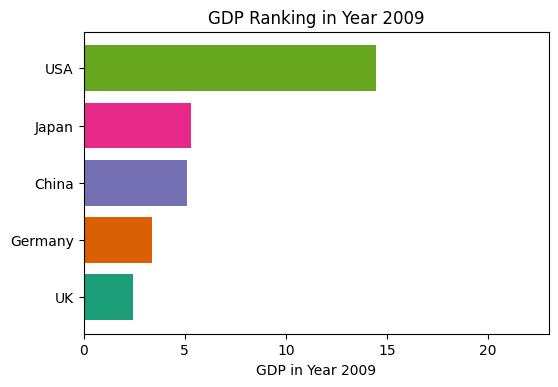

In [16]:
df = df.set_index("year")
yr2009 = df.loc[2009].sort_values()
fig, ax = plt.subplots(dpi=100)
colors = plt.cm.Dark2(range(5))
y = yr2009.index
width = yr2009.values
ax.set_xlim(0,23)
ax.set_title("GDP Ranking in Year 2009")
ax.set_xlabel("GDP in Year 2009")
ax.barh(y=y, width=width, color=colors)

The *set_index()* method in the ***pandas*** library changes the index value of a DataFrame from numerical values 0, 1, 2, ... to the values in a column (in this case, the "year" column). We then retrieve the GDP values of the five countries in 2009 and save it as a Series *yr2009*. The values are sorted based on the GDP values of that year. We select five different colors for the five countries.   

The *barh()* method creates a horizontal bar chart. The y-axis are the names of the five countries, and the width of the horizontal bar is the GDP value of the country. 

### 4.2. Generate Annual Bar Charts 
You'll iterate through years 1970 to 2020. In each iteration, you’ll generate a horizontal bar chart of the GDPs of the five countries, with the country with the highest GDP value on top. You’ll also save the chart on your computer in each iteration. This creates a total of 51 charts.

C:\Users\mark\AppData\Local\Temp\ipykernel_7716\2554344784.py:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(dpi=100)


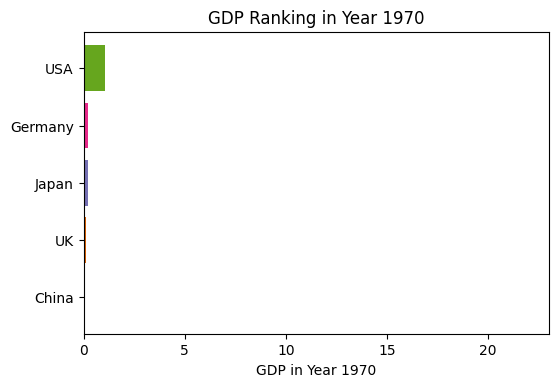

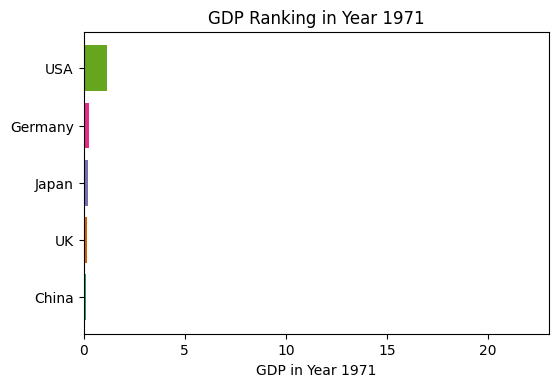

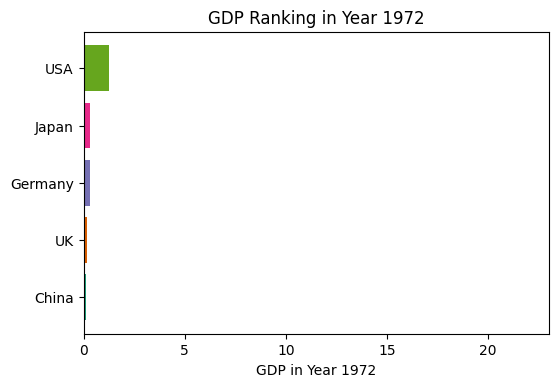

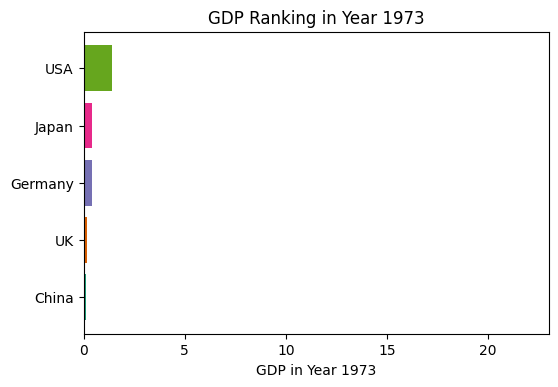

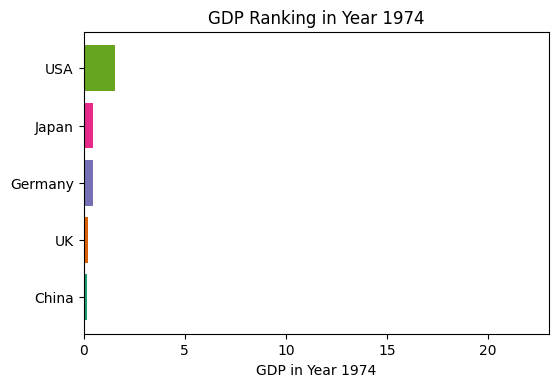

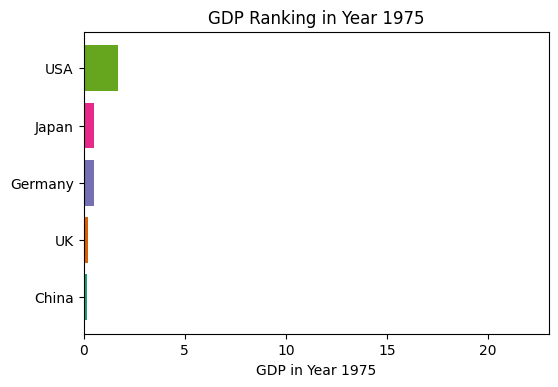

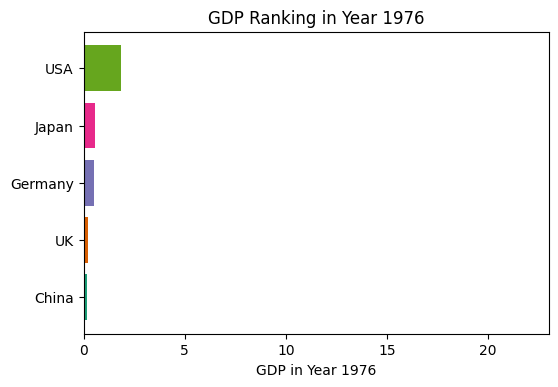

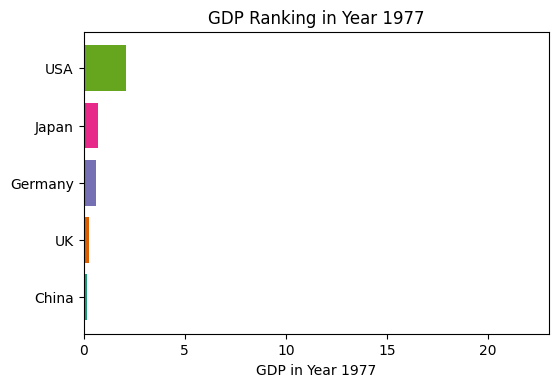

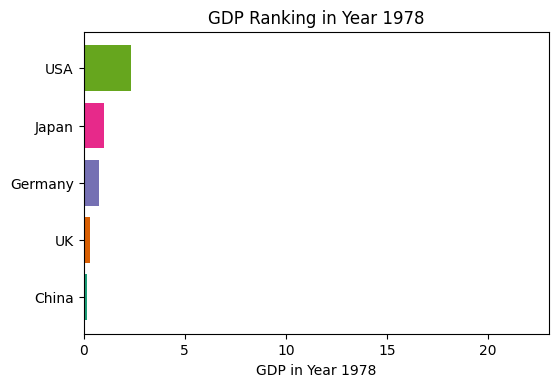

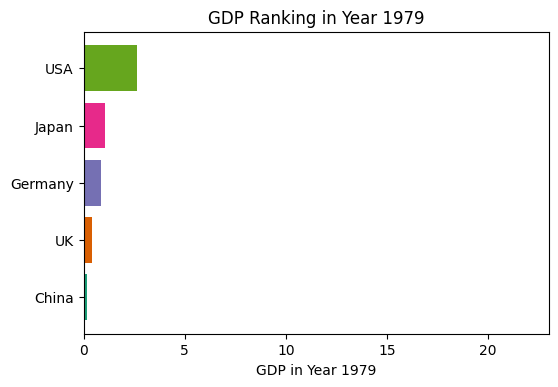

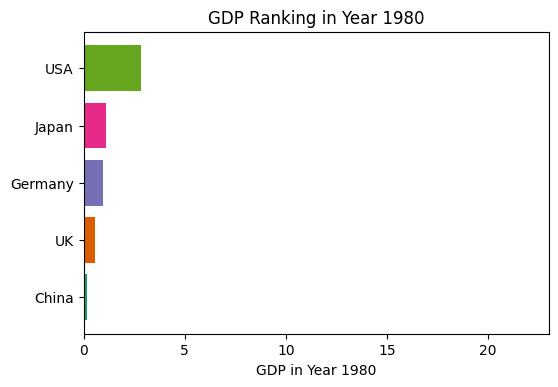

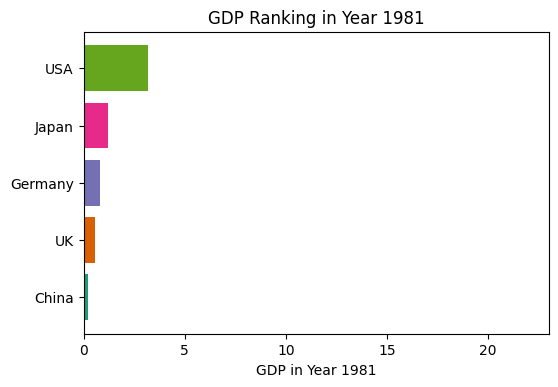

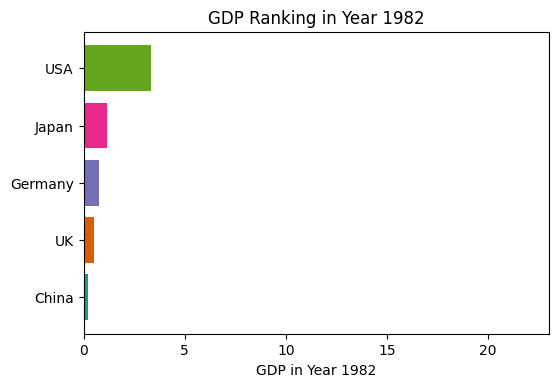

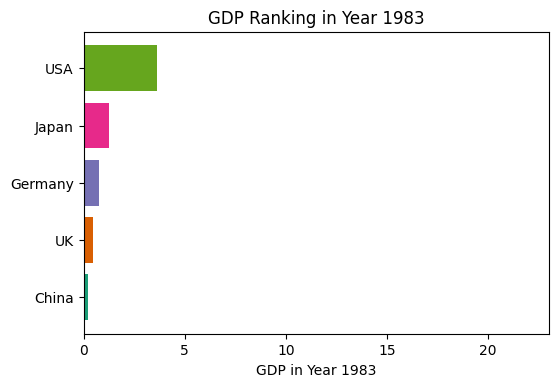

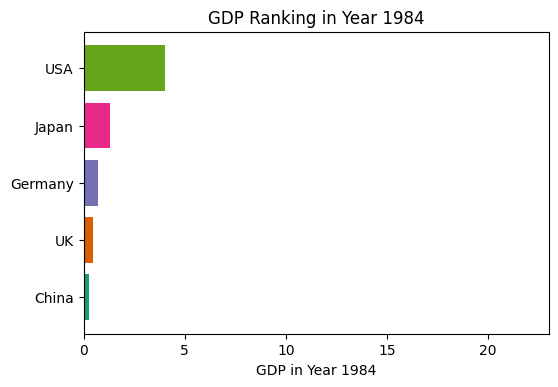

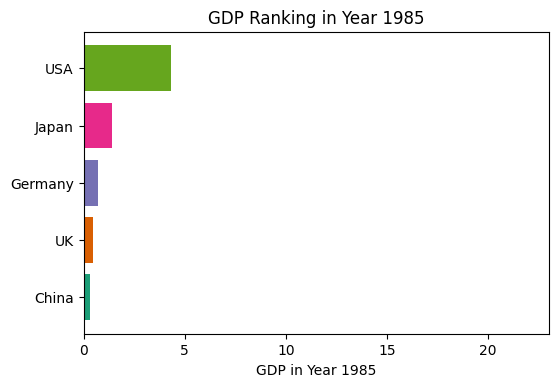

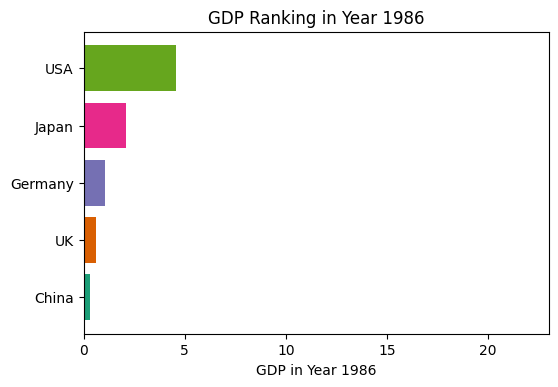

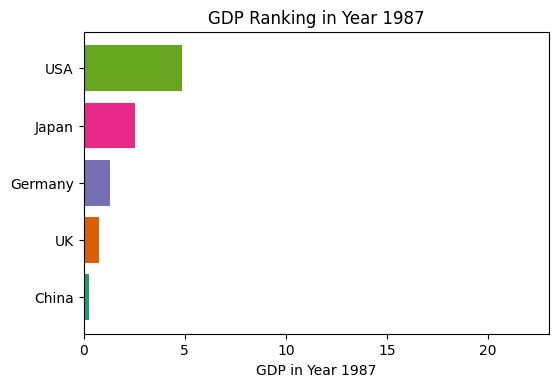

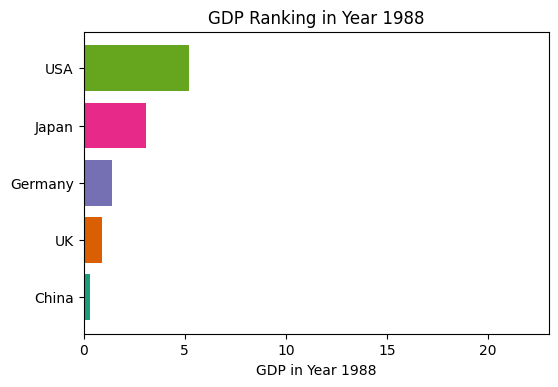

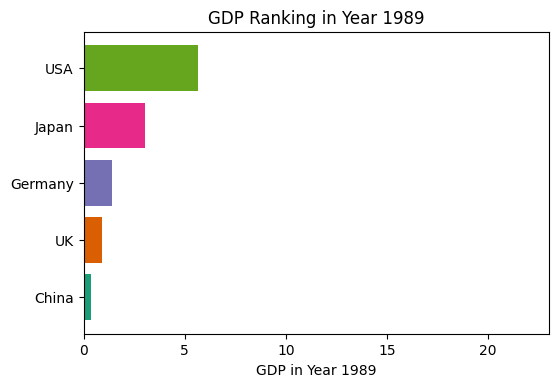

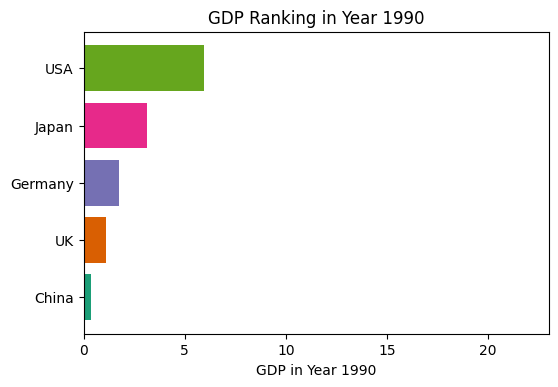

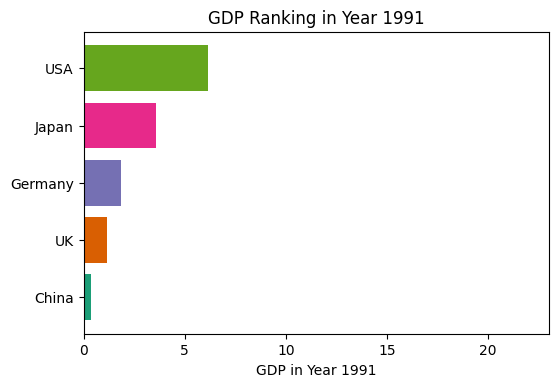

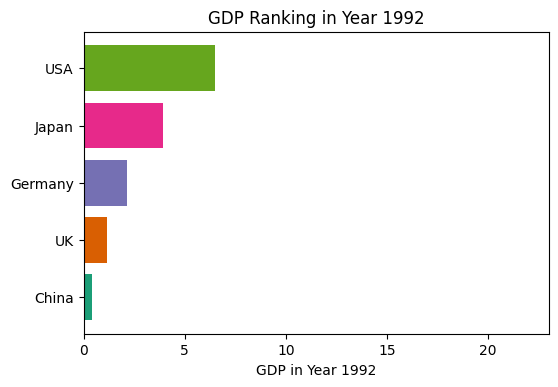

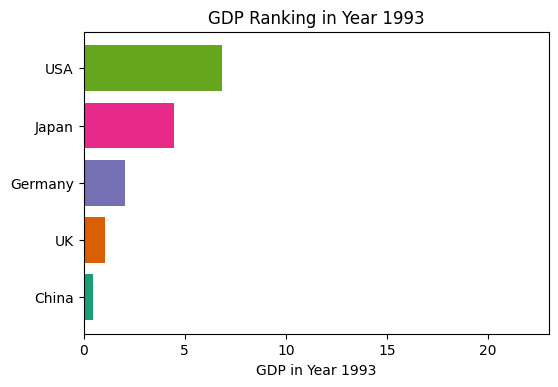

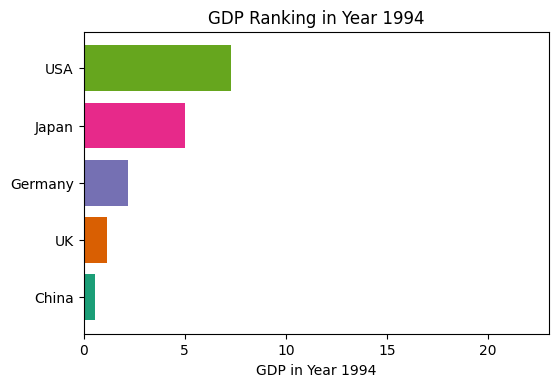

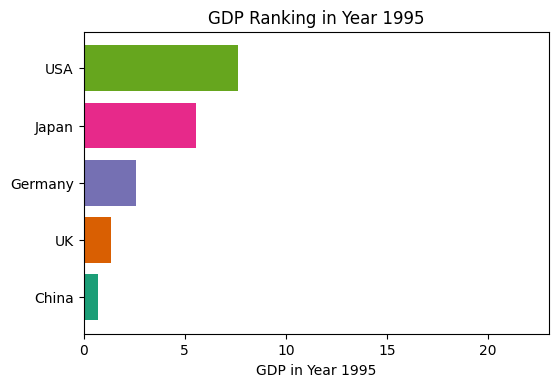

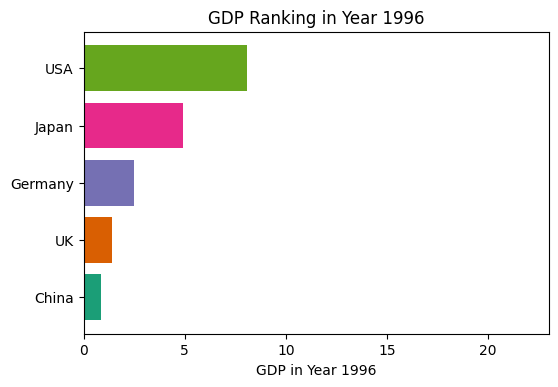

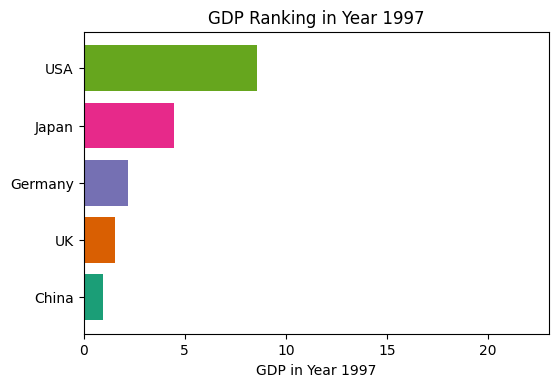

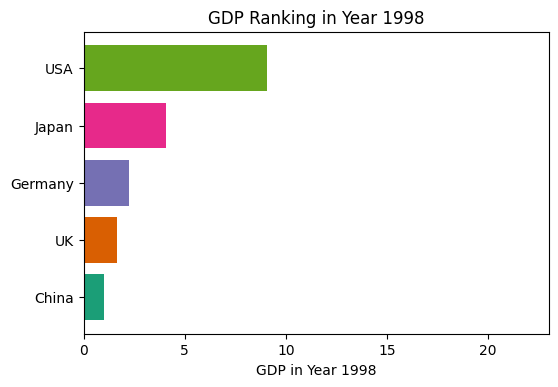

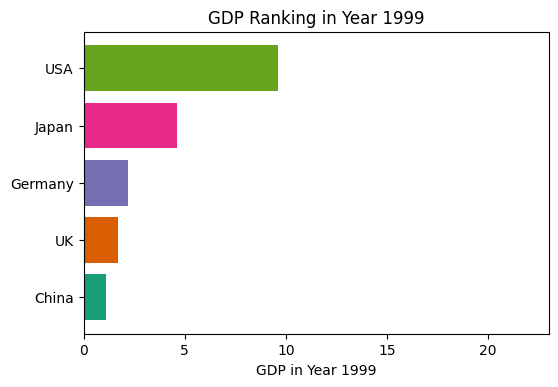

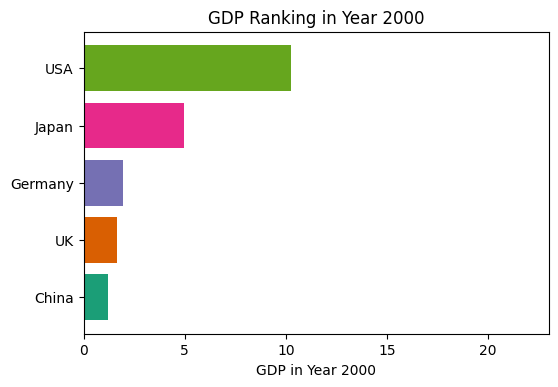

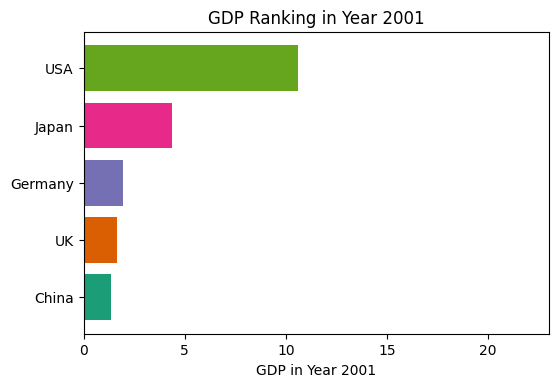

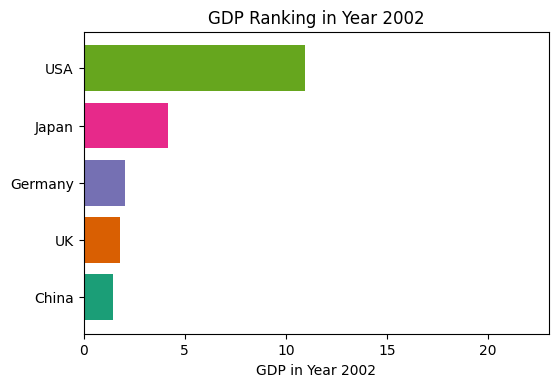

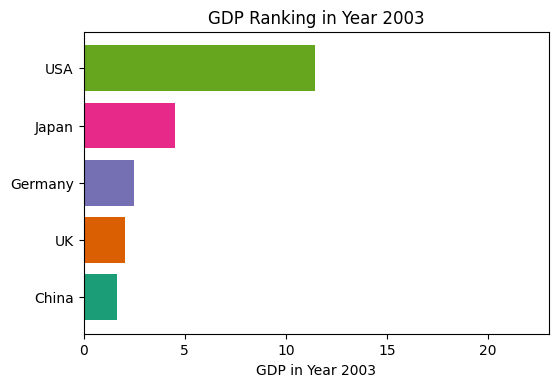

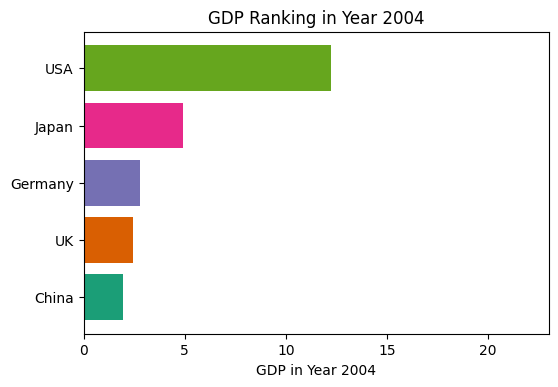

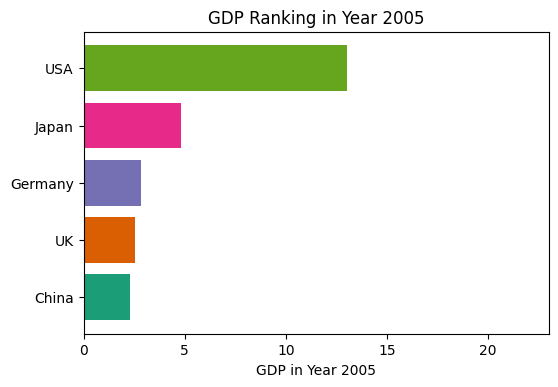

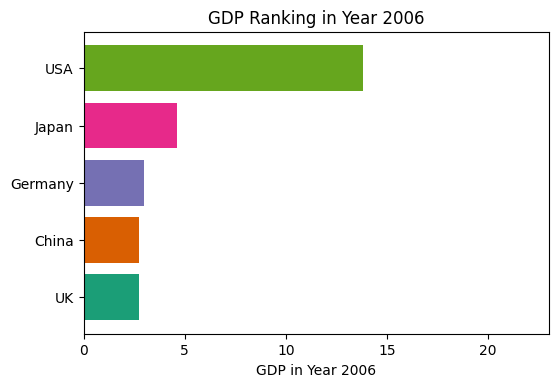

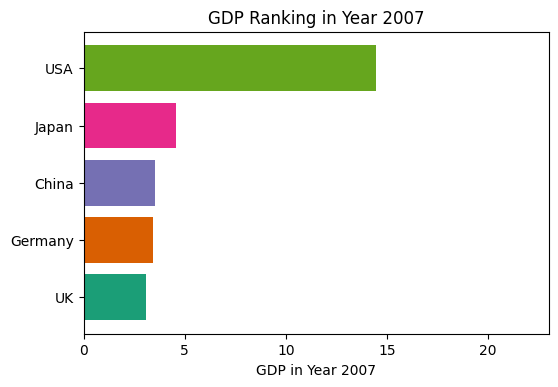

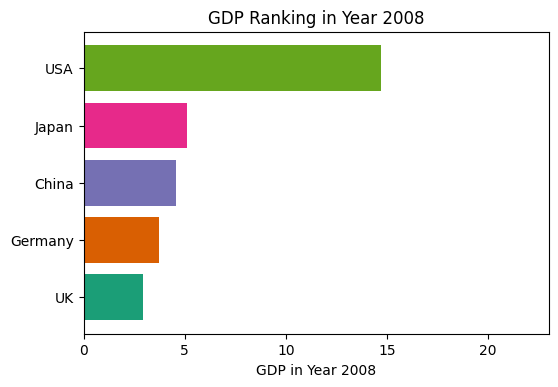

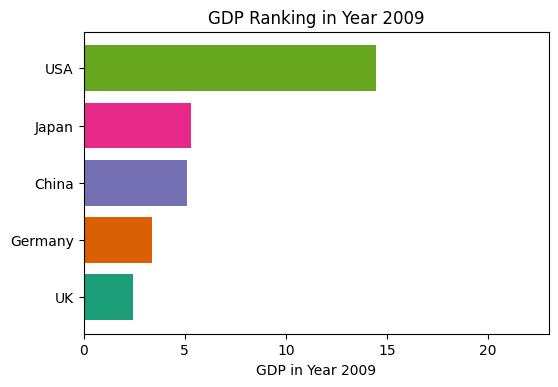

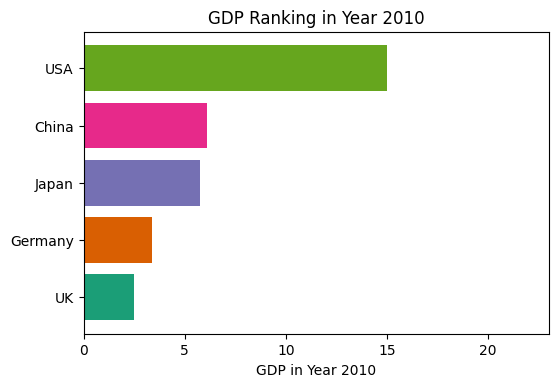

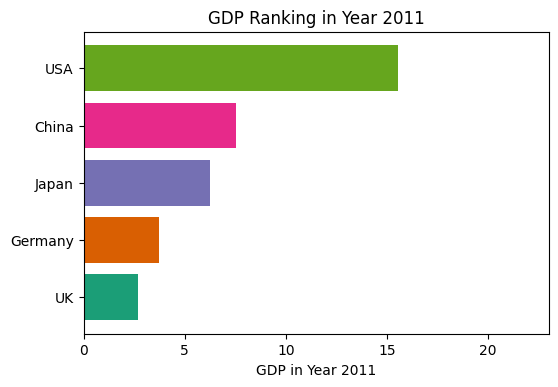

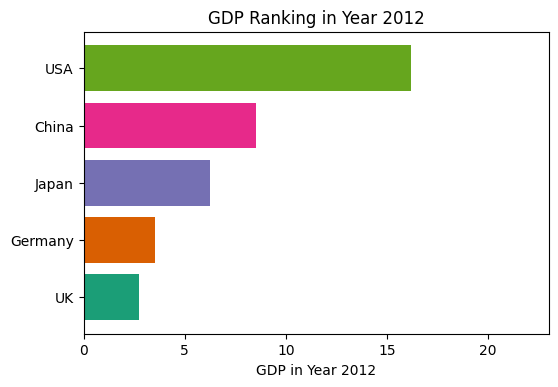

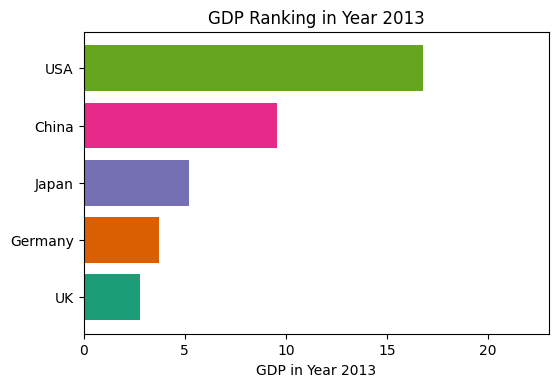

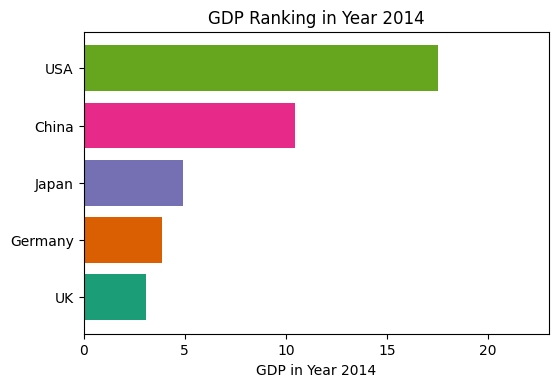

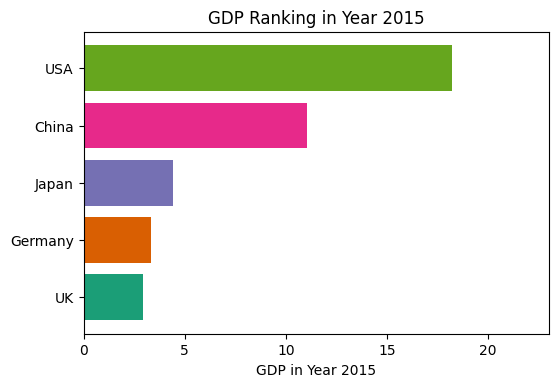

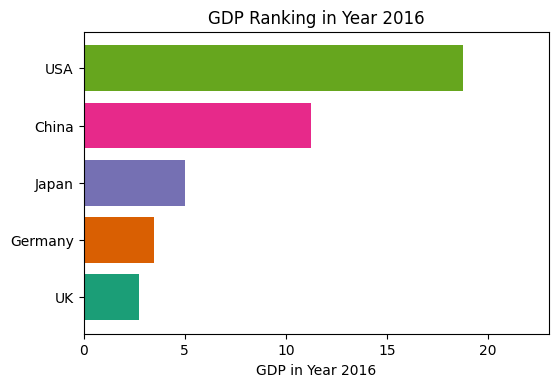

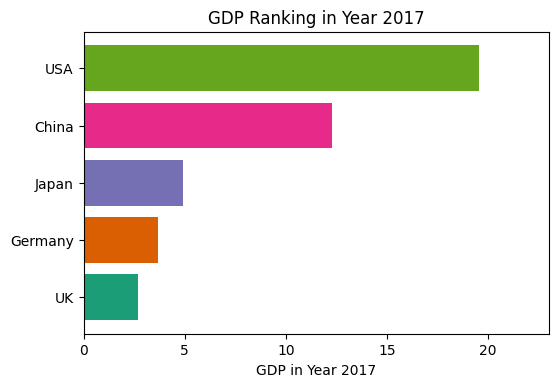

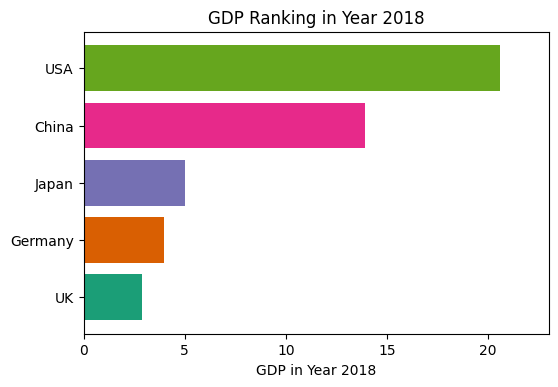

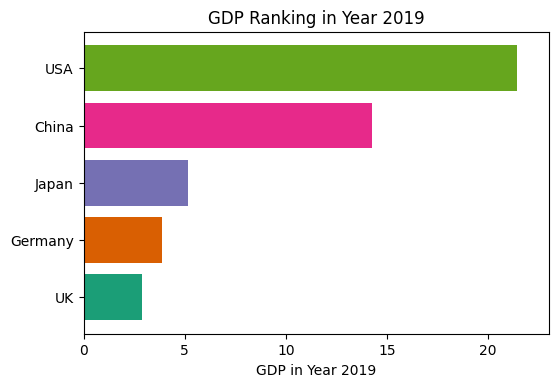

In [17]:
# by year, sorted.
for i in range(1970,2020,1):
    yri = df.loc[i].sort_values()
    fig, ax = plt.subplots(dpi=100)
    colors = plt.cm.Dark2(range(6))
    y = yri.index
    width = yri.values
    ax.set_xlim(0,23)
    ax.set_title(f"GDP Ranking in Year {i}")
    ax.set_xlabel(f"GDP in Year {i}")
    ax.barh(y=y, width=width, color=colors)
    fig.savefig(f"photos/bar_year{i}.png") 

### 4.3. Animate the Bar Charts
The process of converting bar charts into animation is similar to what we have done before for the line plots. We’ll use the ***PIL*** library to convert the charts into numpy arrays. We’ll then use the ***imageio*** library to combine the sequence of arrays into one animation in the ***gif*** format. 

In [18]:
frames=[]
for i in range(1970,2020,1):
    frame=PIL.Image.open(f"photos/bar_year{i}.png") 
    frame=np.asarray(frame)
    frames.append(np.array(frame))
imageio.mimsave('bar_sorted.gif', frames, fps=5)

After you run the above cell, the file *bar_sorted.gif* is generated and saved in your local folder. To view the animation, You can click on the file on your computer to view it, or enter the following lines of code in a new cell:

In [19]:
%%HTML
<img src="./bar_sorted.gif" />

The followign commands work in GitHub as well. 

In [21]:
%%HTML
<img src="https://gattonweb.uky.edu/faculty/lium/ml/bar_sorted.gif" />

## Appendix: Obtain the GDP Values from Word Bank

Below, you'll learn how to obtain the GDP values of the five countries and save it in a CSV file. The raw dataset is downloaded from the World Bank website https://data.worldbank.org/indicator/NY.GDP.MKTP.CD. The dataset is then cleaned up and I kept data for the five countries (USA, China, Japan, Germany, and UK) from 1970 to 2020. The cleaned-up data is placed on my website https://gattonweb.uky.edu/faculty/lium/ml/GDPs.csv. Below is the Python code used to extract the data.

In [22]:
'''
First, go to this site https://data.worldbank.org/indicator/NY.GDP.MKTP.CD
Under Download in the middle right, click on the CSV option to download the CSV files
put the three CSV files in your local folder
'''

import pandas as pd
import numpy as np
import pickle

# 
df=pd.read_csv("API_NY.GDP.MKTP.CD_DS2_en_csv_v2_4019306.csv", skiprows=4)

df=df[(df["Country Name"]=="China") | 
      (df["Country Name"]=="United States") |
      (df["Country Name"]=="Japan") |
      (df["Country Name"]=="Germany") |
      (df["Country Name"]=="United Kingdom")]

df.loc[df['Country Name']=="United States", 'Country Name'] = "USA"
df.loc[df['Country Name']=="United Kingdom", 'Country Name'] = "UK"

print(df.columns)
df=df.drop(['Country Code', 'Indicator Name', 'Indicator Code',
       '1960', '1961', '1962', '1963', '1964', '1965', '1966', 
       '1967', '1968', '1969'], axis=1)

df=df.set_index('Country Name')
df=df.transpose()
df=df/1000000000000
df["year"]=df.index
df.to_csv("GDPs.csv")

Index(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
       '1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968',
       '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977',
       '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986',
       '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995',
       '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021',
       'Unnamed: 66'],
      dtype='object')


This creates the file GDPs.csv that we have used earlier. 